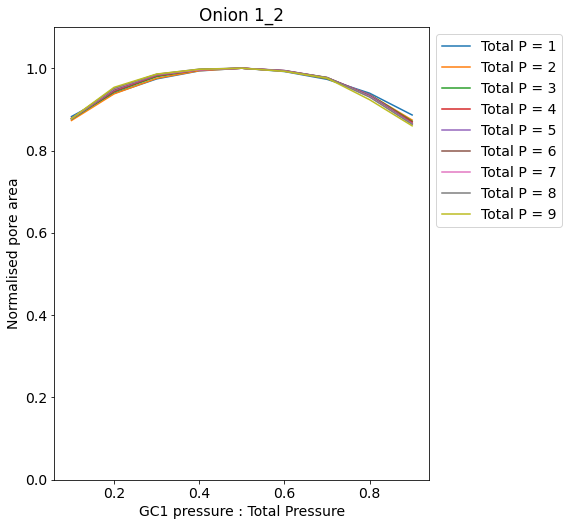

In [4]:
## Code for running Figure 3b

import pandas as pd 
import matplotlib.pyplot as plt

path_to_data = "../data/"
folder = "Figure3b/"

plt.rcParams.update({'font.size': 14})

def calculate_ratio(df, maxP, exp):
    df["ratio"] = df["Left GC Pressure"] / maxP
    df["Area norm"] = (df["Area"]) / (df["Area"].max())
    return df

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

for i in range(1,10):
    results = pd.read_csv(path_to_data + folder + "output_" + str(i) + ".csv")
    results = results[(results["Left GC Pressure"]!= 0) & (results["Right GC Pressure"]!= 0)]
    max_ratio = calculate_ratio(results, i, 1_2)
    ax.plot(max_ratio["ratio"].to_numpy(), max_ratio["Area norm"].to_numpy(), label='Total P = ' + str(i))

# Move the legend to the right side of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout()
ax.set_xlabel("GC1 pressure : Total Pressure")
ax.set_ylabel("Normalised pore area")
ax.set_title("Onion 1_2")
plt.ylim(0,1.1)

plt.savefig("../Figures/Onion_1_2_normalised.svg", bbox_inches='tight')
plt.show()
